# I. Loading and pre-processing the Data

In [1]:
# Import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load the Pima Indians dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
feature_names = names[:8]
data = pd.read_csv(url, names=names)
#Splitting the data into dependent and independent variables
X = data.drop("class", axis=1)
y= data["class"]

# II. Training the single classifiers:

### 1) Decision Tree

In [3]:
# Split the data into training and testing sets
X1, X2, y1, y2 = train_test_split(X,y, random_state= 42, train_size=0.7)
# The DT classifier
DT = DecisionTreeClassifier()
DT.fit(X1,y1).predict(X2)
DT_Pred=DT.predict(X2)
DT_results = accuracy_score(y2,DT_Pred)
print(accuracy_score(y2,DT_Pred))

0.683982683982684


### 2) KNN

In [4]:
# The KNN classifier
KNN = KNeighborsClassifier()
KNN.fit(X1,y1).predict(X2)
KNN_Pred=KNN.predict(X2)
KNN_results = accuracy_score(y2,KNN_Pred)
print(accuracy_score(y2,KNN_Pred))

0.6883116883116883


### 3) MLP

In [5]:
# The MLP classifier
MLP = MLPClassifier(batch_size=32,max_iter=250)
MLP.fit(X1,y1).predict(X2)
MLP_Pred=MLP.predict(X2)
MLP_results = accuracy_score(y2,MLP_Pred)
print(accuracy_score(y2,MLP_Pred))

0.7186147186147186


### Q1 : Train an SVM classifier, what is the performance of SVM on the same dataset?

In [6]:
# The KNN classifier
SVM_ = SVC()
SVM_.fit(X1,y1).predict(X2)
SVM_Pred=SVM_.predict(X2)
SVM_results = accuracy_score(y2,SVM_Pred)
print(accuracy_score(y2,SVM_Pred))

0.7359307359307359


# III. Training the Bagging ensembles

### 1) Bagging using DT as base learner (Random Forest) with 3, 7, 10, 15 and 20 estimators

In [7]:
def my_bag(estimator):
    estimators = [3, 7, 10, 15, 20] # n_bags
    models = []
    for n_estimator in estimators:
        print(f"Pour {n_estimator} estimateurs, on a:")
        DBG = BaggingClassifier(estimator=estimator,max_samples=0.6, n_estimators=n_estimator,
        random_state=42)
        DBG.fit(X1,y1).predict(X2)
        DBG_Pred=DBG.predict(X2)
        DBG_results = accuracy_score(y2,DBG_Pred)
        models.append(DBG_results)
        est = DBG.estimators_
        print(f"accuracy : {accuracy_score(y2,DBG_Pred)}")
    return models, est
models_DT = my_bag(estimator=DecisionTreeClassifier())

Pour 3 estimateurs, on a:
accuracy : 0.7142857142857143
Pour 7 estimateurs, on a:
accuracy : 0.7445887445887446
Pour 10 estimateurs, on a:
accuracy : 0.7575757575757576
Pour 15 estimateurs, on a:
accuracy : 0.7575757575757576
Pour 20 estimateurs, on a:
accuracy : 0.7402597402597403


In [8]:
models_DT

([0.7142857142857143,
  0.7445887445887446,
  0.7575757575757576,
  0.7575757575757576,
  0.7402597402597403],
 [DecisionTreeClassifier(random_state=1952926171),
  DecisionTreeClassifier(random_state=1761383086),
  DecisionTreeClassifier(random_state=1449071958),
  DecisionTreeClassifier(random_state=1910541088),
  DecisionTreeClassifier(random_state=1341730541),
  DecisionTreeClassifier(random_state=1286572245),
  DecisionTreeClassifier(random_state=1005142668),
  DecisionTreeClassifier(random_state=502852014),
  DecisionTreeClassifier(random_state=186414760),
  DecisionTreeClassifier(random_state=1956263048),
  DecisionTreeClassifier(random_state=15592051),
  DecisionTreeClassifier(random_state=1628376228),
  DecisionTreeClassifier(random_state=1638437331),
  DecisionTreeClassifier(random_state=116435712),
  DecisionTreeClassifier(random_state=588556688),
  DecisionTreeClassifier(random_state=358068376),
  DecisionTreeClassifier(random_state=67998415),
  DecisionTreeClassifier(random

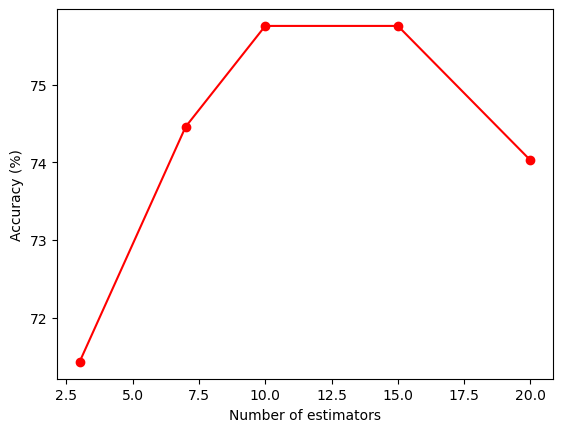

In [10]:
#We plot the accuracy of the different bagging ensembles using three estimators
def my_plot(models):
    models = [i*100 for i in models]
    n_estimators = [3,7,10,15,20]
    plt.plot(n_estimators, models, 'ro-',)
    plt.xlabel("Number of estimators")
    plt.ylabel("Accuracy (%)")
    plt.show()
    
my_plot(models_DT[0])

### 2) Bagging using KNN as base learner with 3, 7, 10, 15 and 20 estimators

In [11]:
models_KNN = my_bag(estimator = KNeighborsClassifier())

Pour 3 estimateurs, on a:
accuracy : 0.6926406926406926
Pour 7 estimateurs, on a:
accuracy : 0.7359307359307359
Pour 10 estimateurs, on a:
accuracy : 0.6926406926406926
Pour 15 estimateurs, on a:
accuracy : 0.6926406926406926
Pour 20 estimateurs, on a:
accuracy : 0.7056277056277056


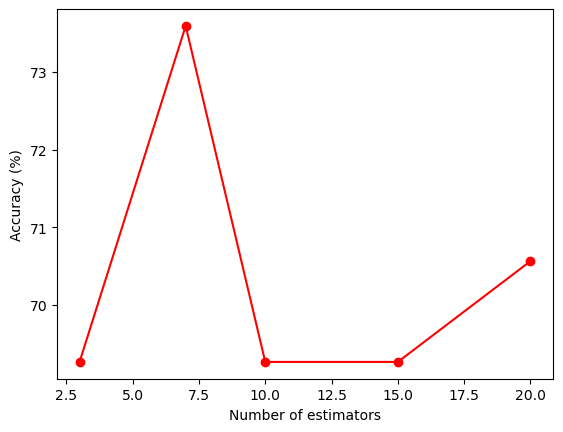

In [12]:
#We plot the accuracy of the different bagging ensembles using three estimators
my_plot(models_KNN[0])

### 3) Bagging using MLP as base learner with 3, 7, 10, 15 and 20 estimators

In [13]:
models_MLP = my_bag(estimator = MLPClassifier(batch_size=32,max_iter=250))

Pour 3 estimateurs, on a:
accuracy : 0.696969696969697
Pour 7 estimateurs, on a:
accuracy : 0.7056277056277056
Pour 10 estimateurs, on a:
accuracy : 0.7056277056277056
Pour 15 estimateurs, on a:
accuracy : 0.70995670995671
Pour 20 estimateurs, on a:
accuracy : 0.70995670995671


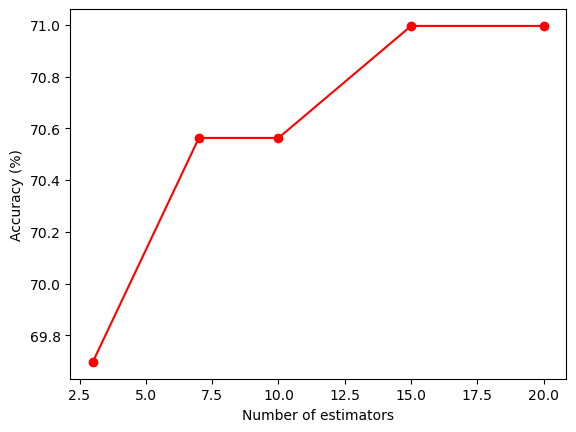

In [14]:
#We plot the accuracy of the different bagging ensembles using three estimators
my_plot(models_MLP[0])

### Q3 : Construct bagging ensembles with different number of estimators using SVM as base learner, how does the performance of the SVM bagging ensemble change when we add more estimators?

In [15]:
models_SVM = my_bag(estimator = SVC())

Pour 3 estimateurs, on a:
accuracy : 0.7532467532467533
Pour 7 estimateurs, on a:
accuracy : 0.7445887445887446
Pour 10 estimateurs, on a:
accuracy : 0.7402597402597403
Pour 15 estimateurs, on a:
accuracy : 0.7402597402597403
Pour 20 estimateurs, on a:
accuracy : 0.7359307359307359


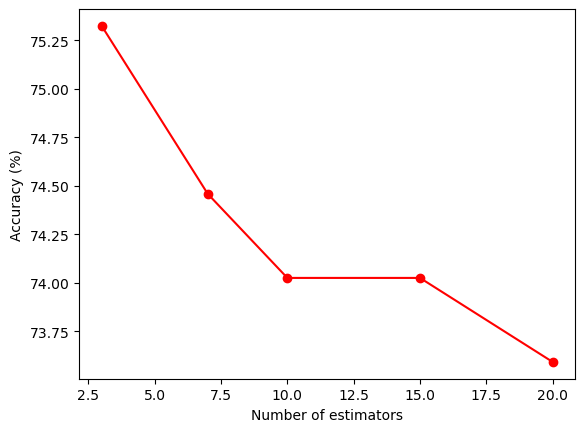

In [16]:
#We plot the accuracy of the different bagging ensembles using three estimators
my_plot(models_SVM[0])

We noticed that the performance of the SVM bagging ensemble decreases slightly as we add more estimators. The accuracy for 3 estimators is 0.753, which is slightly higher than the accuracy for 7, 10, 15, and 20 estimators (0.745, 0.740, 0.740, and 0.736, respectively). This indicates that adding more estimators does not necessarily lead to better performance for the SVM bagging ensemble.

# IV. Comparing the bagging ensembles with their base learners

/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning

Text(0, 0.5, 'Accuracy (%)')

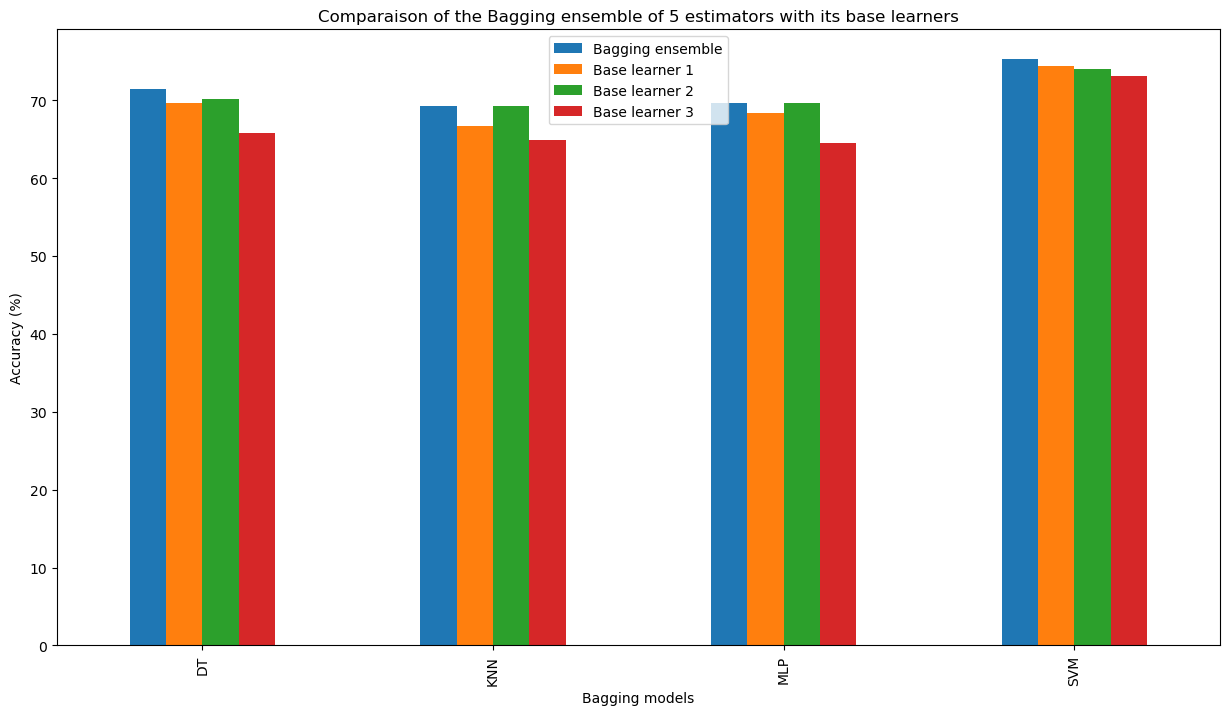

In [17]:
r1_dt=accuracy_score(y2,models_DT[1][0].predict(X2))
r2_dt=accuracy_score(y2,models_DT[1][1].predict(X2))
r3_dt=accuracy_score(y2,models_DT[1][2].predict(X2))

r1_knn=accuracy_score(y2,models_KNN[1][0].predict(X2))
r2_knn=accuracy_score(y2,models_KNN[1][1].predict(X2))
r3_knn=accuracy_score(y2,models_KNN[1][2].predict(X2))

r1_mlp=accuracy_score(y2,models_MLP[1][0].predict(X2))
r2_mlp=accuracy_score(y2,models_MLP[1][1].predict(X2))
r3_mlp=accuracy_score(y2,models_MLP[1][2].predict(X2))

r1_svm=accuracy_score(y2,models_SVM[1][0].predict(X2))
r2_svm=accuracy_score(y2,models_SVM[1][1].predict(X2))
r3_svm=accuracy_score(y2,models_SVM[1][2].predict(X2))

plotdata = pd.DataFrame({
"Bagging ensemble":[models_DT[0][0]*100, models_KNN[0][0]*100, models_MLP[0][0]*100, models_SVM[0][0]*100],
"Base learner 1":[r1_dt*100,r1_knn*100,r1_mlp*100, r1_svm*100],
"Base learner 2":[r2_dt*100,r2_knn*100,r2_mlp*100, r2_svm*100],
"Base learner 3":[r3_dt*100,r3_knn*100,r3_mlp*100, r3_svm*100]},   
index=["DT", "KNN", "MLP", "SVM"]
)
plotdata.plot(kind="bar",figsize=(15, 8))
plt.title("Comparaison of the Bagging ensemble of 5 estimators with its base learners")
plt.xlabel("Bagging models")
plt.ylabel("Accuracy (%)")

### Q3 : Comparison with the bagging ensembles of 7 estimators and their 7 base learners.

/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/home/olivier/anaconda3/lib/python3.9/site-packages/sklearn/base.py:413: UserWar

Text(0, 0.5, 'Accuracy (%)')

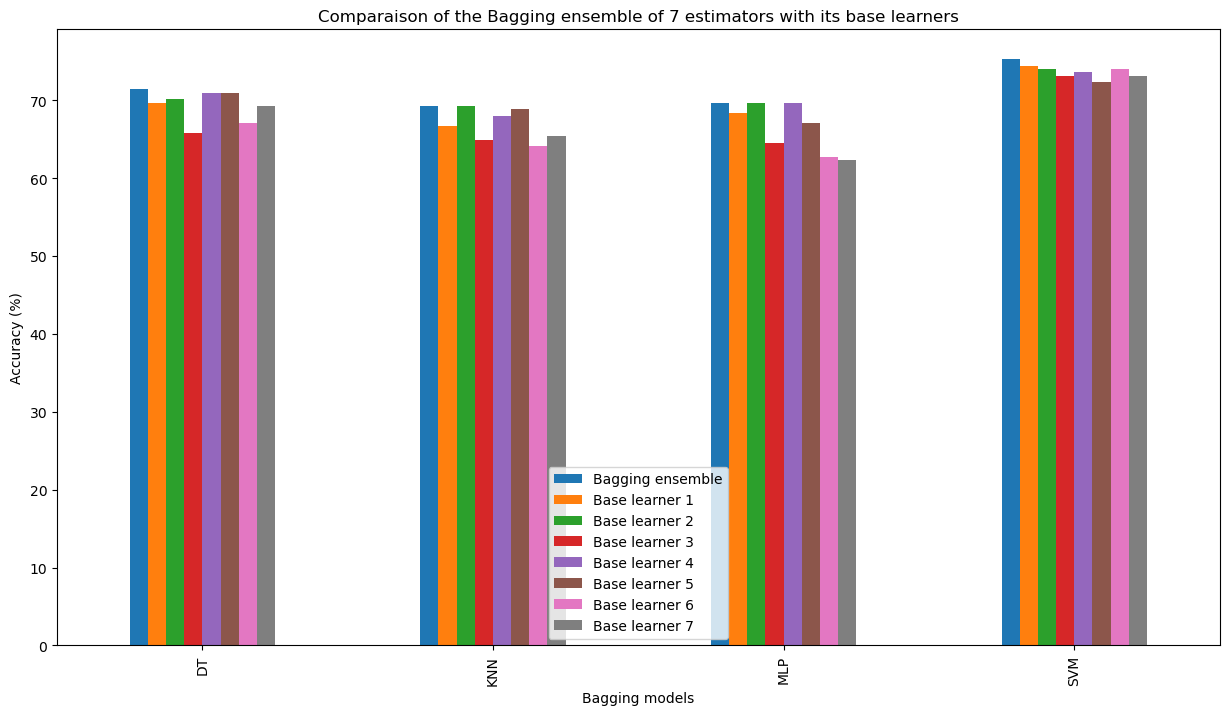

In [18]:
r1_dt=accuracy_score(y2,models_DT[1][0].predict(X2))
r2_dt=accuracy_score(y2,models_DT[1][1].predict(X2))
r3_dt=accuracy_score(y2,models_DT[1][2].predict(X2))
r4_dt=accuracy_score(y2,models_DT[1][3].predict(X2))
r5_dt=accuracy_score(y2,models_DT[1][4].predict(X2))
r6_dt=accuracy_score(y2,models_DT[1][5].predict(X2))
r7_dt=accuracy_score(y2,models_DT[1][6].predict(X2))

r1_knn=accuracy_score(y2,models_KNN[1][0].predict(X2))
r2_knn=accuracy_score(y2,models_KNN[1][1].predict(X2))
r3_knn=accuracy_score(y2,models_KNN[1][2].predict(X2))
r4_knn=accuracy_score(y2,models_KNN[1][3].predict(X2))
r5_knn=accuracy_score(y2,models_KNN[1][4].predict(X2))
r6_knn=accuracy_score(y2,models_KNN[1][5].predict(X2))
r7_knn=accuracy_score(y2,models_KNN[1][6].predict(X2))

r1_mlp=accuracy_score(y2,models_MLP[1][0].predict(X2))
r2_mlp=accuracy_score(y2,models_MLP[1][1].predict(X2))
r3_mlp=accuracy_score(y2,models_MLP[1][2].predict(X2))
r4_mlp=accuracy_score(y2,models_MLP[1][3].predict(X2))
r5_mlp=accuracy_score(y2,models_MLP[1][4].predict(X2))
r6_mlp=accuracy_score(y2,models_MLP[1][5].predict(X2))
r7_mlp=accuracy_score(y2,models_MLP[1][6].predict(X2))


r1_svm=accuracy_score(y2,models_SVM[1][0].predict(X2))
r2_svm=accuracy_score(y2,models_SVM[1][1].predict(X2))
r3_svm=accuracy_score(y2,models_SVM[1][2].predict(X2))
r4_svm=accuracy_score(y2,models_SVM[1][3].predict(X2))
r5_svm=accuracy_score(y2,models_SVM[1][4].predict(X2))
r6_svm=accuracy_score(y2,models_SVM[1][5].predict(X2))
r7_svm=accuracy_score(y2,models_SVM[1][6].predict(X2))

plotdata = pd.DataFrame({
"Bagging ensemble":[models_DT[0][0]*100, models_KNN[0][0]*100, models_MLP[0][0]*100, models_SVM[0][0]*100],
"Base learner 1":[r1_dt*100,r1_knn*100,r1_mlp*100, r1_svm*100],
"Base learner 2":[r2_dt*100,r2_knn*100,r2_mlp*100, r2_svm*100],
"Base learner 3":[r3_dt*100,r3_knn*100,r3_mlp*100, r3_svm*100],
"Base learner 4":[r4_dt*100,r4_knn*100,r4_mlp*100, r4_svm*100],
"Base learner 5":[r5_dt*100,r5_knn*100,r5_mlp*100, r5_svm*100],
"Base learner 6":[r6_dt*100,r6_knn*100,r6_mlp*100, r6_svm*100],
"Base learner 7":[r7_dt*100,r7_knn*100,r7_mlp*100, r7_svm*100]},

index=["DT", "KNN", "MLP", "SVM"]
)
plotdata.plot(kind="bar",figsize=(15, 8))
plt.title("Comparaison of the Bagging ensemble of 7 estimators with its base learners")
plt.xlabel("Bagging models")
plt.ylabel("Accuracy (%)")

# V. Comparing the built bagging ensembles

Text(0, 0.5, 'Accuracy (%)')

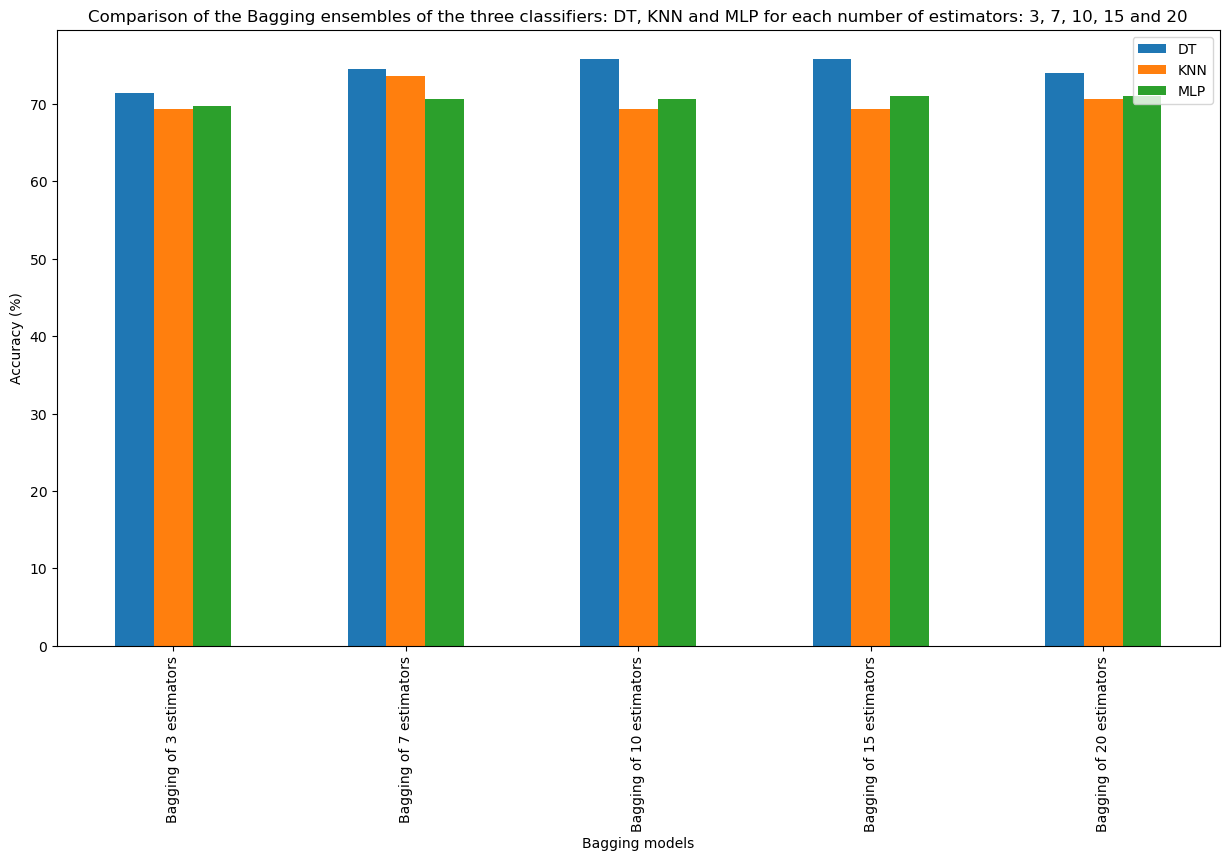

In [19]:
plotdata = pd.DataFrame({
    "DT":[models_DT[0][0]*100, models_DT[0][1]*100, models_DT[0][2]*100, models_DT[0][3]*100, models_DT[0][4]*100],
    "KNN":[models_KNN[0][0]*100, models_KNN[0][1]*100, models_KNN[0][2]*100, models_KNN[0][3]*100, models_KNN[0][4]*100],
    "MLP":[models_MLP[0][0]*100, models_MLP[0][1]*100, models_MLP[0][2]*100, models_MLP[0][3]*100, models_MLP[0][4]*100],}, 
    index=["Bagging of 3 estimators", "Bagging of 7 estimators", "Bagging of 10 estimators", "Bagging of 15 estimators", "Bagging of 20 estimators"])

plotdata.plot(kind="bar", figsize=(15, 8))
plt.title("Comparison of the Bagging ensembles of the three classifiers: DT, KNN and MLP for each number of estimators: 3, 7, 10, 15 and 20")
plt.xlabel("Bagging models")
plt.ylabel("Accuracy (%)")

### Q4: Add the five SVM bagging ensembles to the previous figure and compare it with the rest of the ensembles.

Text(0, 0.5, 'Accuracy (%)')

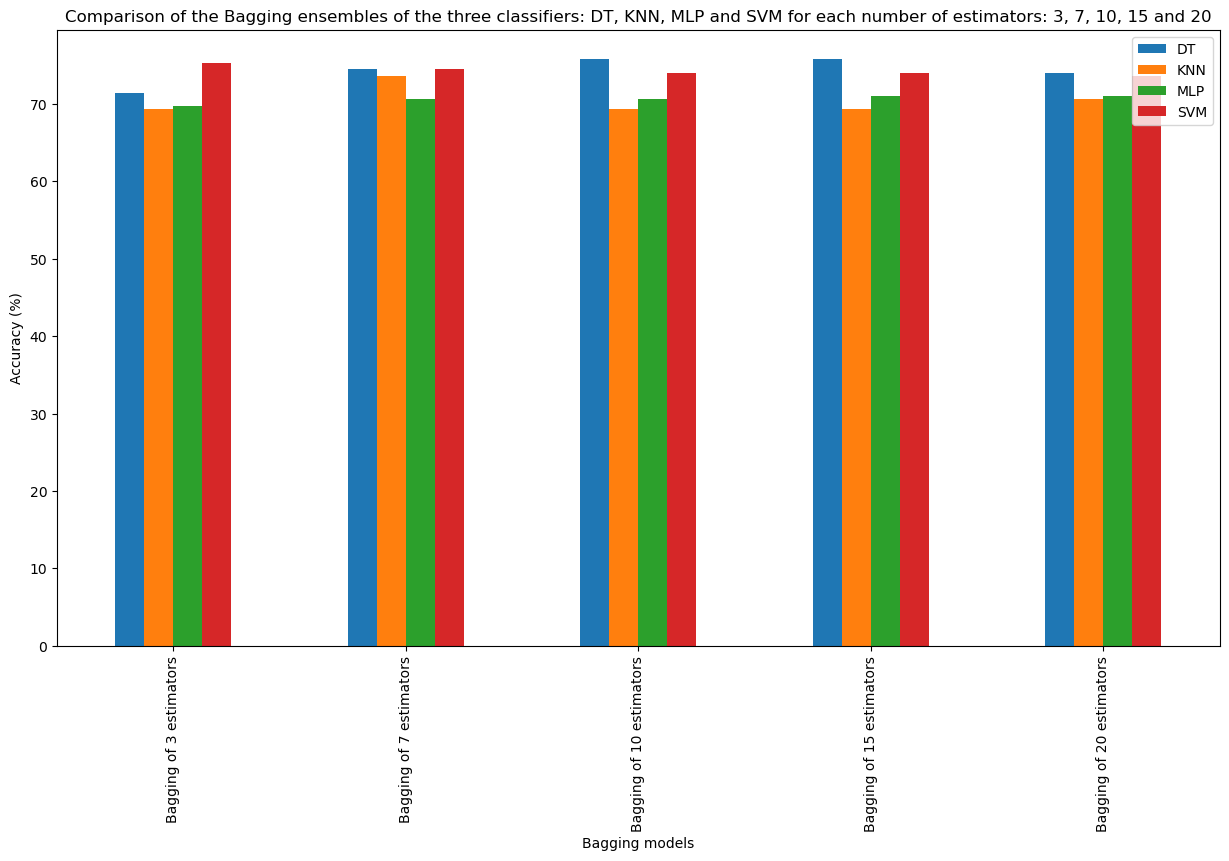

In [20]:
plotdata = pd.DataFrame({
    "DT":[models_DT[0][0]*100, models_DT[0][1]*100, models_DT[0][2]*100, models_DT[0][3]*100, models_DT[0][4]*100],
    "KNN":[models_KNN[0][0]*100, models_KNN[0][1]*100, models_KNN[0][2]*100, models_KNN[0][3]*100, models_KNN[0][4]*100],
    "MLP":[models_MLP[0][0]*100, models_MLP[0][1]*100, models_MLP[0][2]*100, models_MLP[0][3]*100, models_MLP[0][4]*100],
    "SVM":[models_SVM[0][0]*100, models_SVM[0][1]*100, models_SVM[0][2]*100, models_SVM[0][3]*100, models_SVM[0][4]*100]
}, index=["Bagging of 3 estimators", "Bagging of 7 estimators", "Bagging of 10 estimators", "Bagging of 15 estimators", "Bagging of 20 estimators"])

plotdata.plot(kind="bar", figsize=(15, 8))
plt.title("Comparison of the Bagging ensembles of the three classifiers: DT, KNN, MLP and SVM for each number of estimators: 3, 7, 10, 15 and 20")
plt.xlabel("Bagging models")
plt.ylabel("Accuracy (%)")


# VI. Comparing the single classifiers and the bagging ensemble

Text(0, 0.5, 'Accuracy (%)')

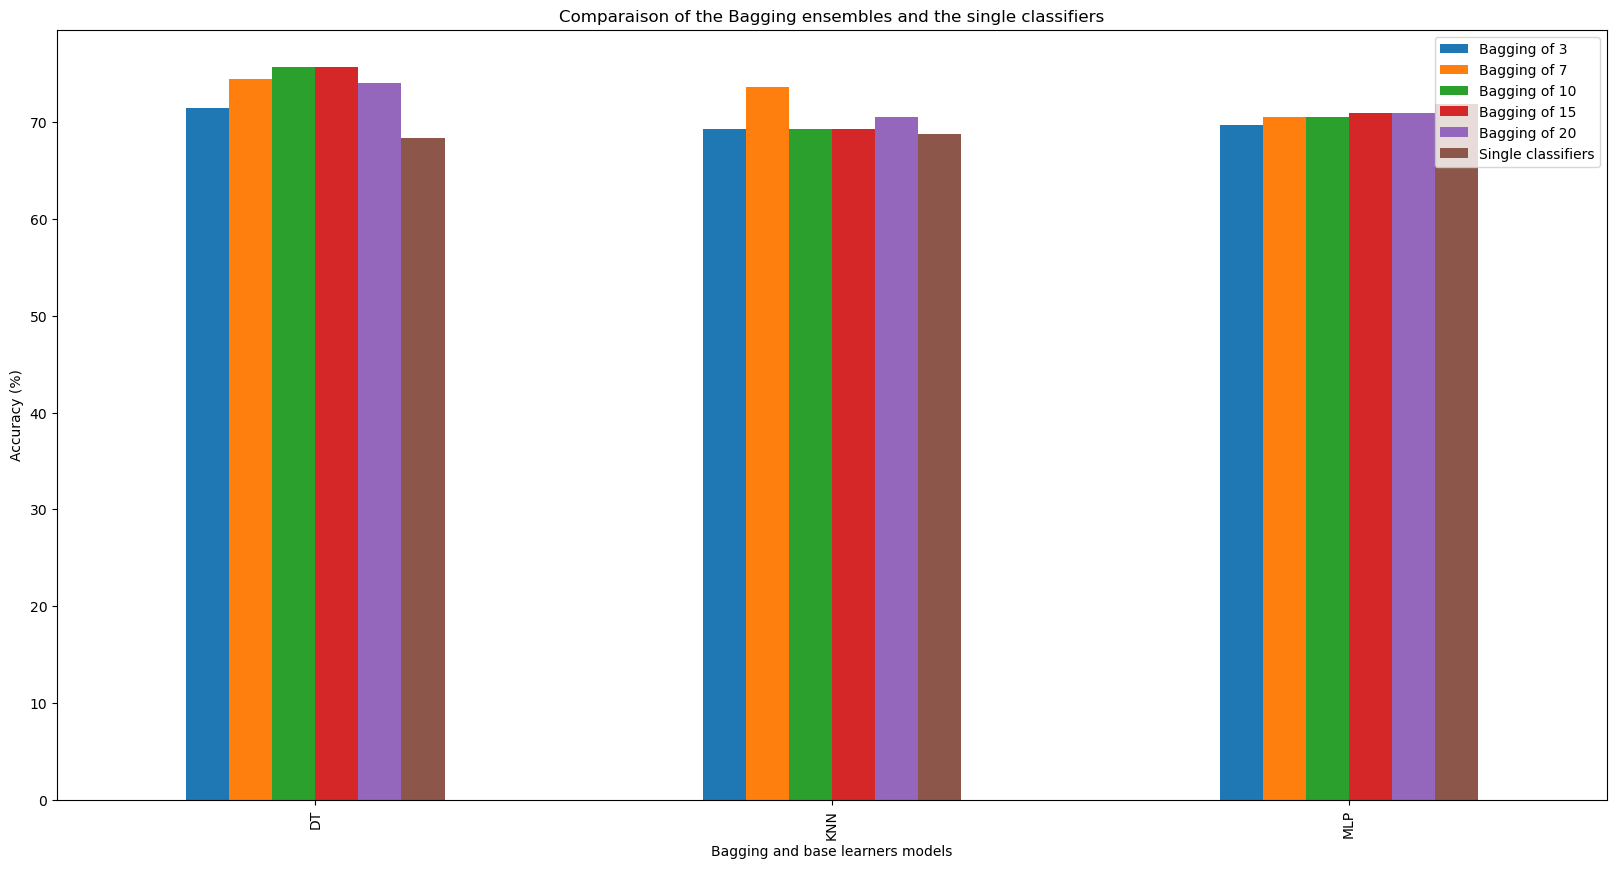

In [21]:
plotdata = pd.DataFrame({
"Bagging of 3":[models_DT[0][0]*100, models_KNN[0][0]*100, models_MLP[0][0]*100],
"Bagging of 7":[models_DT[0][1]*100, models_KNN[0][1]*100, models_MLP[0][1]*100],
"Bagging of 10":[models_DT[0][2]*100, models_KNN[0][2]*100, models_MLP[0][2]*100],
"Bagging of 15":[models_DT[0][3]*100, models_KNN[0][3]*100, models_MLP[0][3]*100],
"Bagging of 20":[models_DT[0][4]*100, models_KNN[0][4]*100, models_MLP[0][4]*100],
"Single classifiers":[DT_results*100,KNN_results*100,MLP_results*100]},
index=["DT", "KNN", "MLP"])
plotdata.plot(kind="bar",figsize=(20, 10))
plt.title("Comparaison of the Bagging ensembles and the single classifiers")
plt.xlabel("Bagging and base learners models")
plt.ylabel("Accuracy (%)")

### Q5: Add the SVM bagging ensembles to the previous figure and compare it with the SVM single classifier.

Text(0, 0.5, 'Accuracy (%)')

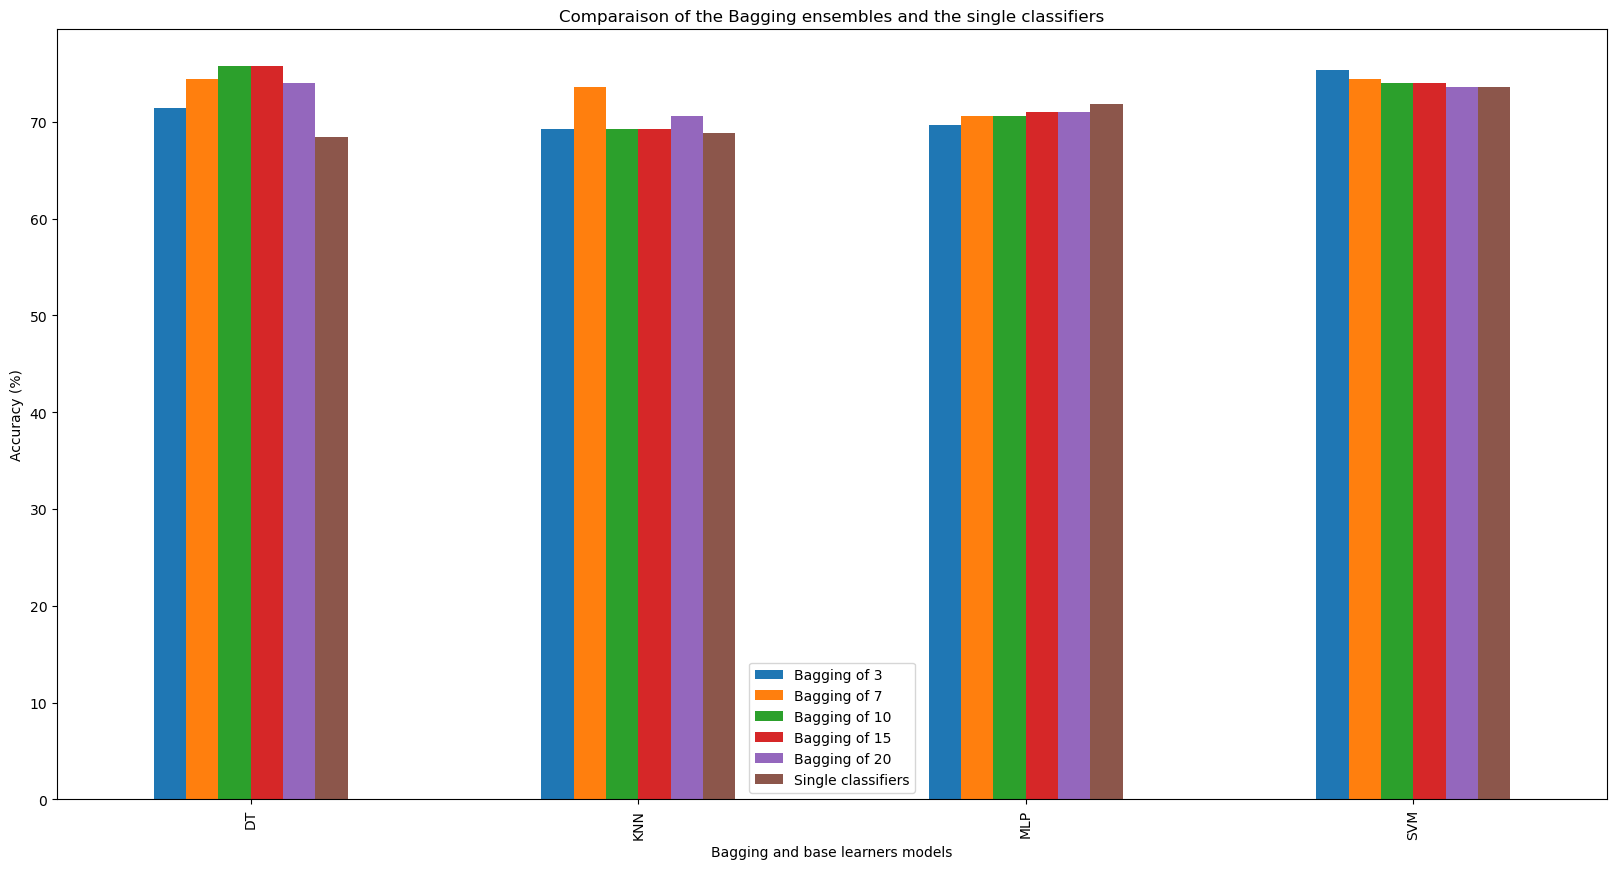

In [22]:
plotdata = pd.DataFrame({
"Bagging of 3":[models_DT[0][0]*100, models_KNN[0][0]*100, models_MLP[0][0]*100, models_SVM[0][0]*100],
"Bagging of 7":[models_DT[0][1]*100, models_KNN[0][1]*100, models_MLP[0][1]*100, models_SVM[0][1]*100],
"Bagging of 10":[models_DT[0][2]*100, models_KNN[0][2]*100, models_MLP[0][2]*100, models_SVM[0][2]*100],
"Bagging of 15":[models_DT[0][3]*100, models_KNN[0][3]*100, models_MLP[0][3]*100, models_SVM[0][3]*100],
"Bagging of 20":[models_DT[0][4]*100, models_KNN[0][4]*100, models_MLP[0][4]*100, models_SVM[0][4]*100],
"Single classifiers":[DT_results*100,KNN_results*100,MLP_results*100, SVM_results*100]},
index=["DT", "KNN", "MLP", "SVM"])
plotdata.plot(kind="bar",figsize=(20, 10))
plt.title("Comparaison of the Bagging ensembles and the single classifiers")
plt.xlabel("Bagging and base learners models")
plt.ylabel("Accuracy (%)")